**Lab 2** for the course of *Selected Topics in Music and Acoustic Engineering* :

***Machine Learning for Audio and Acoustic Engineering***
---

# **Before you start**

*   Go to "*File*" --> "*Save a copy in Drive*"
*   Open that copy (might open automatically)
*   Then continue below

# **Lab 2: Introduction to ML Methods in Audio**
In this lab we will explore some well-known Machine Learning methods making use of the Scikit-Learn library. We'll go through matrix factorization methods and some popular supervised and unsupervised learning techniques.

---

# Exercise 1. Import libraries

* We need a number of libraries. Import them once to use throughout the document.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
import librosa, librosa.display
import IPython
from pathlib import Path
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

---

# Exercise 2. Fetch the Dataset

*   ESC-50: a dataset for Environmental Sound Classification (https://github.com/karolpiczak/ESC-50, https://www.karolpiczak.com/papers/Piczak2015-ESC-Dataset.pdf)
 * 50 classes,  40 files per class, 5s clips
*   Download & unzip the dataset running the cell below. This will take a minute. You will see the new files on the left (folder icon).

In [3]:
!wget https://github.com/karolpiczak/ESC-50/archive/master.zip
!unzip master.zip
!rm master.zip


--2025-03-19 14:37:58--  https://github.com/karolpiczak/ESC-50/archive/master.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master [following]
--2025-03-19 14:37:59--  https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.121.10
Connecting to codeload.github.com (codeload.github.com)|140.82.121.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: 'master.zip'

     0K .......... .......... .......... .......... .......... 1.26M
    50K .......... .......... .......... .......... .......... 2.48M
   100K .......... .......... .......... .......... .......... 37.2M
   150K .......... .......... .......... .......... .......... 2.59M
   200K .......... 

---

# Exercise 3. Metadata and analysis I

***Tasks:***
* Use pandas to read the csv file in *ESC-50-master/meta/*
* Print the first elements of the csv. Pandas has a standard function for this.
* Print the list of *unique* class labels in the dataset, and check whether there really are 50 of them

In [7]:

# Path to the CSV file
fn_csv = 'ESC-50-master/meta/esc50.csv'

# Read the CSV file using pandas
df = pd.read_csv(fn_csv)

# Print the first few rows of the dataset
print(df.head())

# Get the unique class labels
unique_classes = df['category'].unique()

# Print the number of unique classes and check if there are 50
print(unique_classes)
print(f"Number of unique classes in the dataset: {len(unique_classes)}")


            filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A
['dog' 'chirping_birds' 'vacuum_cleaner' 'thunderstorm' 'door_wood_knock'
 'can_opening' 'crow' 'clapping' 'fireworks' 'chainsaw' 'airplane'
 'mouse_click' 'pouring_water' 'train' 'sheep' 'water_drops'
 'church_bells' 'clock_alarm' 'keyboard_typing' 'wind' 'footsteps' 'frog'
 'cow' 'brushing_teeth' 'car_horn' 'crackling_fire' 'helicopter'
 'drinking_sipping' 'rain' 'insects' 'laughing' 'hen' 'engine' 'breathing'
 'crying_baby' 'hand_saw' 'coughing' 'glass_breaking' 'snoring'
 'toilet_flush' 'pig' 'washing_machine' 'clock_tick' 'sneezing' 'rooster'
 'sea_wa

Expected output:
```
    filename            fold  target  category        esc10   src_file  take
0   1-100032-A-0.wav    1     0       dog             True    100032    A
1   1-100038-A-14.wav   1     14      chirping_birds  False   100038    A
2   1-100210-A-36.wav   1     36      vacuum_cleaner  False   100210    A
3   1-100210-B-36.wav   1     36      vacuum_cleaner  False   100210    B
4   1-101296-A-19.wav   1     19      thunderstorm    False   101296    A
```

```
Unique classes: ['dog' 'chirping_birds' ... ]
Count: 50
```

---

# Exercise 4. Metadata and analysis II

* View and listen to some examples in the dataset to get a "feeling" for the sound classes.

vacuum_cleaner


vacuum_cleaner


thunderstorm


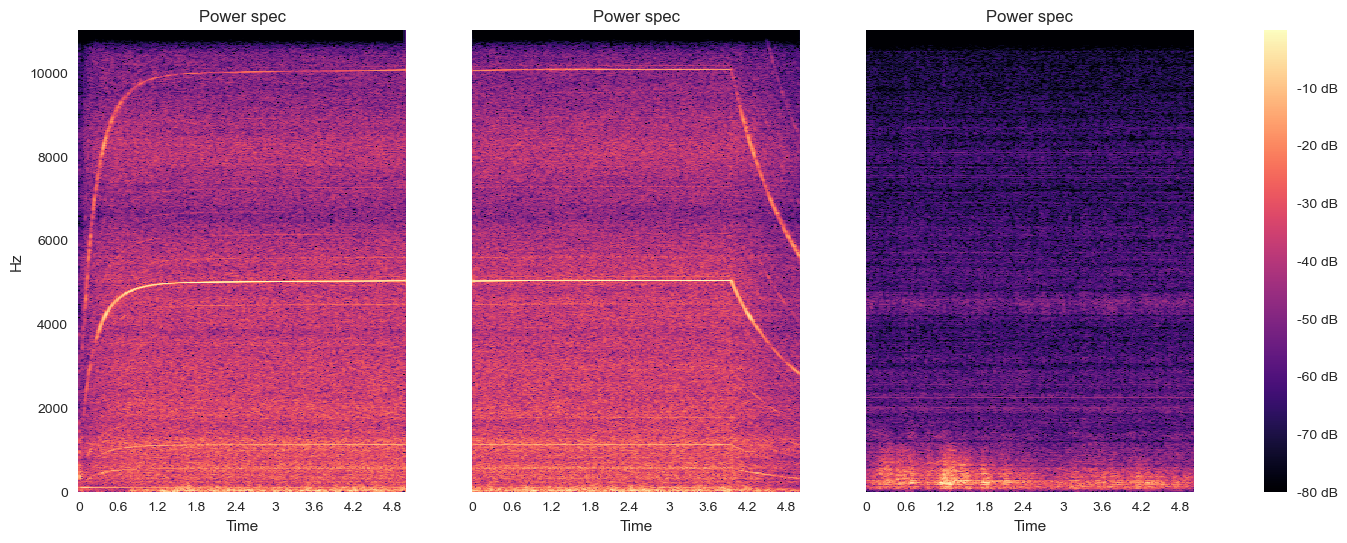

In [8]:
# Setup some filepaths
path = 'ESC-50-master/audio/'
file0 = path + df['filename'][2]  # We use indices [2-4] here, feel free to choose other files
file1 = path + df['filename'][3]
file2 = path + df['filename'][4]

# Show audio player for each file
print(df['category'][2])
IPython.display.display(IPython.display.Audio(data=file0))
print(df['category'][3])
IPython.display.display(IPython.display.Audio(data=file1))
print(df['category'][4])
IPython.display.display(IPython.display.Audio(data=file2))

# Plot mel specs
files = [file0, file1, file2]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
for i in range(3):
  y, sr = librosa.load(files[i])
  D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
  img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[i])
  ax[i].set(title='Power spec')
  ax[i].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

---

# Exercise 5. ESC-5: Curation

Let's select 2 classes (*our_classes=['dog', 'rooster']*) from ESC-50 to make things a bit faster.

***Tasks:***
* Collect all files that belong to *our_classes*.
* Put the files and their respective classes in separate lists. Make sure their indices are equal (meaning: the value at index 3 of list *A* is related to the value at index 3 of list *B*).
  * Idea 1: Use *df.values* to iterate over the rows of the csv
  * Idea 2: Use *df.query('category in @our_classes')*
* Print the first 5 elements of each list as (file, class)-tuples. Also, print the overall lengths of the lists.

In [9]:
# Define the classes to filter
our_classes = ['dog', 'rooster']  # This will also serve as a class map later.

# Initialize empty lists for file names and class labels
esc5_X = []  # File list
esc5_y = []  # Class list

# Path to the CSV file
fn_csv = 'ESC-50-master/meta/esc50.csv'

### START CODING ###
# Load the CSV file into a DataFrame
df = pd.read_csv(fn_csv)

# Filter the DataFrame to only include rows where 'category' is in our_classes
df_filtered = df.query('category in @our_classes')

# Populate the lists
esc5_X = df_filtered['filename'].tolist()  # List of filenames
esc5_y = df_filtered['category'].tolist()  # Corresponding class labels

# Print the first 5 elements of each list as (file, class) tuples
print(list(zip(esc5_X[:5], esc5_y[:5])))

# Print the lengths of the lists
print(f'Lengths: {len(esc5_X)}, {len(esc5_y)}')

[('1-100032-A-0.wav', 'dog'), ('1-110389-A-0.wav', 'dog'), ('1-26806-A-1.wav', 'rooster'), ('1-27724-A-1.wav', 'rooster'), ('1-30226-A-0.wav', 'dog')]
Lengths: 80, 80


Expected output:
```
[('1-100032-A-0.wav', 'dog'), ('1-110389-A-0.wav', 'dog'), ('1-26806-A-1.wav', 'rooster'), ('1-27724-A-1.wav', 'rooster'), ('1-30226-A-0.wav', 'dog')]
Lengths: esc5_X: 80, esc5_y: 80
```



# Exercise 6. NMF Decomposition
The following code picks one signal of class 'dog' and class 'rooster' and mix both signals together in a new array called 'audiomix'.

**Note:** Listen to the signals and make sure the signal is active in most of the audio duration.

In [11]:
import IPython.display as ipd
# Convert esc5_y to a NumPy array to allow boolean indexing
esc5_y = np.array(esc5_y)
esc5_X = np.array(esc5_X)

# Select a file from the 'dog' and 'rooster' classes
dogs_files = esc5_X[esc5_y == 'dog'][0]  # First 'dog' file
rooster_files = esc5_X[esc5_y == 'rooster'][0]  # First 'rooster' file

### START CODING ###
# Load the audio files
signal_0, sr = librosa.load(path + dogs_files)
signal_1, _ = librosa.load(path + rooster_files)

### END CODING ###

# Play the sounds
print('Dog example')
ipd.display(ipd.Audio(signal_0, rate=sr))

print('Rooster example')
ipd.display(ipd.Audio(signal_1, rate=sr))

# Compute the mixture of the two signals
audiomix = signal_0 / np.max(signal_0) + signal_1 / np.max(signal_1)
audiomix = 0.5 * audiomix / np.max(audiomix)

print('Mixture')
ipd.display(ipd.Audio(audiomix, rate=sr))

Dog example


Rooster example


Mixture


Now let's compute the spectrogram of the mixture and decompose the magnitude information using NMF with 2 components (see librosa.decompose.decompose):

In [12]:
# Compute the STFT of the mixed signal
S = librosa.stft(audiomix)

# Compute the magnitude and phase
X, X_phase = librosa.magphase(S)

### START CODING ###
from librosa.decompose import decompose

# Apply NMF with 2 components
W, H = decompose(X, n_components=2)

# Print the shapes of W and H
print(W.shape, H.shape)

(1025, 2) (2, 216)


Expected output:
```
(1025, 2) (2, 216)
```

Compare the original and approximated spectrum:

In [ ]:
plt.figure(figsize=(20,8))

#original
plt.subplot(1,2,1)
librosa.display.specshow(20*np.log10(X+np.finfo(float).eps), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.title('Original')
plt.colorbar()

#after NMF
plt.subplot(1,2,2)
librosa.display.specshow(20*np.log10(np.dot(W,H)+np.finfo(float).eps), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.title('NMF')
plt.colorbar();

Now let's represent the learned spectral patterns and temporal activations for each component:

In [ ]:
plt.figure(figsize=(20,8))

t_frames = librosa.frames_to_time(np.arange(H.shape[1]))
plot_iter=1
for i in range(n_components):
  plt.subplot(2,n_components,plot_iter)
  plt.plot(20*np.log10(W[:,i]+np.finfo(float).eps))
  plt.xlabel('Freq[Hz]')
  plt.title('Spectral Pattern (Basis) {}'.format(i))
  plt.ylim(bottom=-70);
  plot_iter += 1

  plt.subplot(2,n_components,plot_iter)
  plt.plot(t_frames, H[i,:])
  plt.xlabel('Time [s]')
  plt.title('Temporal Activation {}'.format(i));
  plot_iter += 1

Finally let's reconstruct the temporal signal of each component (use the phase information of the original mix signal) and listen to the result.

In [ ]:
reconstructed_signals = []

### START CODING ###
for i in range(n_components):
  component = ...

  #come back to the time domain
  print(f'Component: {i}')
  IPython.display.display(IPython.display.Audio(librosa.istft(component), rate=sr))

### END CODING ###

# Exercise 7. Harmonic-Percussive Decomposition
Now, apply librosa's harmonic-percussive source separation to extract again two components.
**Tasks**
*   Compute the harmonic-percussive (see librosa.decompose.hps)
*   Display the harmonic and the percussive spectrograms
*   Listen to the obtained results
*   Discuss the differences between the standard NMF and the Harmonic-Percussive separation.

In [ ]:
### START CODING ###
Hmm, Prs = ...
...

IPython.display.display(IPython.display.Audio(librosa.istft(Hmm), rate=sr))
IPython.display.display(IPython.display.Audio(librosa.istft(Prs), rate=sr))
### END CODING ###

# Exercise 8. Feature Extraction
Compute the mean ZCR and standard deviation of the spectral flatness for the examples in signals_0 (dogs) and signals_1 (rooster). Define a function to extract those features (call it 'extract_features') and store the extracted features into two arrays: 'dog_features' and 'rooster_features'

In [ ]:
# Function definition
def extract_features(signal):
  ### START CODING ###
  ...
  return ...
  ### END COD

In [ ]:
# Feature Extraction
dog_features = np.array([extract_features(x) for x in signal_0])
rooster_features = np.array([extract_features(x) for x in signal_1])

print(dog_features.shape) #40 samples and 2 feature each
print(rooster_features.shape)

Expected output:
```
(40, 2)
(40, 2)
```

Represent the histograms for each feature for the two classes and discuss which of the two features seems to be better for classification.

In [ ]:
# First feature (ZCR)
plt.figure(figsize=(20,8))
plt.hist(dog_features[:,0], color='b', alpha=0.5, bins=10)
plt.hist(rooster_features[:,0], color='r', alpha=0.5, bins=10)
plt.title('Zero Crossing Rate Feature')
plt.legend(('dog','rooster'))
plt.xlabel('Zero Crossing Rate - Mean')
plt.ylabel('Count');

# Second feature (SF)
### START CODING ###
...

### END COD

### ADD YOUR DISCUSSION HERE!

# Exercise 9. Principal Component Analysis
Redefine the feature extractor to extract 3 features, adding to the previous ones the mean value of the spectral centroid (see librosa.feature.spectral_centroid).

In [ ]:
# Function definition
def extract_features(signal):
  ### START CODING ###
  ...
  return ...
  ### END COD

In [ ]:
# Feature Extraction
dog_features = np.array([extract_features(x) for x in signal_0])
rooster_features = np.array([extract_features(x) for x in signal_1])

print(dog_features.shape) #40 samples and 3 feature each
print(rooster_features.shape)

Expected output:
```
(40, 3)
(40, 3)
```

Create a matrix 'feature_table' stacking all the features a use sklearn 'scale' over such matrix. Create as well a label vector indicating the true label for each row of 'feature_table'

In [ ]:
from sklearn.preprocessing import scale

 ### START CODING ###
feature_table = np.vstack(...)
labels_gt = ...
### END CODING ###

# Scale the features
training_features = scale(feature_table, axis=0)

fig = plt.figure(figsize=(20,13))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(training_features[labels_gt==1,0], training_features[labels_gt==1,1], training_features[labels_gt==1,2], c='b')
ax.scatter(training_features[labels_gt==0,0], training_features[labels_gt==0,1], training_features[labels_gt==0,2], c='r');
ax.legend(('dog','rooster'))
ax.set_title('3D feature space scatterplot')
ax.set_xlabel('Zero Crossing Rate - Mean')
ax.set_ylabel('Spectral Flatness - Std')
ax.set_zlabel('Spectral Centroid - Std');

Now apply PCA for reducing the dimensionality (see sklearn.decomposition.PCA) to two dimensions using whiten='true' and plot the corresponding scatterplot:

In [ ]:
### START CODING ###

#Create dimensionality reduction model
...

#Apply the tranformation
Y = model.transform(X)

#Plotting The Result
plt.figure(figsize=(20,13))
plt.scatter(Y[labels_gt==1,0], Y[labels_gt==1,1], c='b')
plt.scatter(Y[labels_gt==0,0], Y[labels_gt==0,1], c='r')
plt.title('After PCA - 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(('dog', 'rooster'));
#from 3d --> 2d
### END COD

# Exercise 10. Support Vector Machine

Fit a linear SVM classifier with parameter C=1 to the PCA transformed data. Use the following helper function to draw the classifier hyperplanes of interest:

In [ ]:
def draw_classplane(ax,model,xrange):
  w = model.coef_[0]
  b = model.intercept_[0]
  a = -w[0] / w[1]
  xx = np.linspace(xrange[0], xrange[1])
  yy = a * xx - (b/ w[1])
  margin = 1 / np.sqrt(np.sum(w** 2))
  yy_down = yy - np.sqrt(1 + a ** 2) * margin
  yy_up = yy + np.sqrt(1 + a ** 2) * margin
  ax.plot(xx, yy, 'k-')
  ax.plot(xx, yy_down, 'k--')
  ax.plot(xx, yy_up, 'k--')

In [ ]:
### START CODING ###

# Model fitting
...

# Model prediction
...
### END CODING ###

Represent two subplots to compare the ground truth data and the classification result. Plot the classification hyperplanes and margin using the provided function 'draw_classplane'

In [ ]:
### START CODING ###
plt.figure(figsize=(20,8))

#Ground Truth Data
plt.subplot(1,2,1)
plt.scatter(Y[labels_gt==1,0], Y[labels_gt==1,1], c='r')
plt.scatter(Y[labels_gt==0,0], Y[labels_gt==0,1], c='b')
plt.title('Ground Truth Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(('dog', 'rooster'))

#Classification Result
...
### END CODING ###

#Draw Hyperplane and margins
draw_classplane(plt.gca(), model, (-2,4));

Compute the accuracy of the classification result (use sklearn.metrics.accuracy_score).

In [ ]:
acc = ...
print(f'Accuracy: {acc}')

Expected output (might differ slightly):
```
Accuracy:  0.7875
```


Now, apply a RBF kernel for non-linear classification:

In [ ]:
### START CODING ###
model = sklearn.svm.SVC(...)
model.fit(...)
labels = model.predict(Y)
### END CODING ###

Draw the resulting classification contour and compute the accuracy:

In [ ]:
plt.figure(figsize=(20,13))

#for representation purposes
h = 0.02
x_min, x_max = Y[:,0].min() -1 , Y[:,0].max() +1
y_min, y_max = Y[:,1].min() -1 , Y[:,1].max() +1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max,h))

#display the boundary by predicting on every point on the grid
Z = model.predict(np.c_[ xx.ravel(), yy.ravel()])
# Put the result into color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)

plt.xlim(xx.min(), xx.max());
plt.ylim(yy.min(), yy.max());

plt.scatter(Y[labels==1,0],Y[labels==1,1],c='r')
plt.scatter(Y[labels==0,0],Y[labels==0,1],c='b')
plt.title('Classification Result with RBF Kernel with C ={}'.format(penalty))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(('dog', 'rooster'));

In [ ]:
### START CODING ###
acc = ...
print('Accuracy: ', acc)
### END CODING ###

Expected output (might differ slightly):
```
Accuracy:  0.85
```

Experiment with different parameters of C. Try different values also for the "gamma" parameter of the RBF kernel.

Find a combination of parameters representing an overfitting and underfitting.

In [ ]:
### START CODING ###


### END CODING ###

# Exercise 11. Support Vector Machine
Cluster the PCA projected data into **2** groups using k-Means (see sklearn.cluster.KMeans).

In [ ]:
### START CODING ###
model = ...
labels = ...
### END CODING ###

acc = sklearn.metrics.accuracy_score(labels_gt, labels)
# Account for possible inversion
if 1-acc > acc:
  acc = 1-acc
  labels = 1 - labels

print(f'Accuracy: {acc}')

Represent the scatterplots of the original data and the two resultant clusters. Plot the final k-Means centroids as well.

In [ ]:
plt.figure(figsize=(20,8))

#Ground Truth Data
plt.subplot(1,2,1)
plt.scatter(input[labels_gt==1,0], input[labels_gt==1,1], c='b')
plt.scatter(input[labels_gt==0,0], input[labels_gt==0,1], c='r')
plt.title('Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(('dog', 'rooster'))

#Classification Result
plt.subplot(1,2,2)
plt.scatter(input[labels==1,0], input[labels==1,1], c='b')
plt.scatter(input[labels==0,0], input[labels==0,1], c='r')
plt.title('Predicted Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1], color='black', marker='^')
plt.legend(('Class 1', 'Class 2', 'Centroids'));

#Exercise 12. k-NN
Fit a k-NN classifier (sklearn.neighbors.KNeighborsClassifier) to the same data and experiment with different k parameters. Discuss the results.

In [ ]:
### START CODING ###
...
### END CODING ###

### YOUR DISCUSSION HERE!